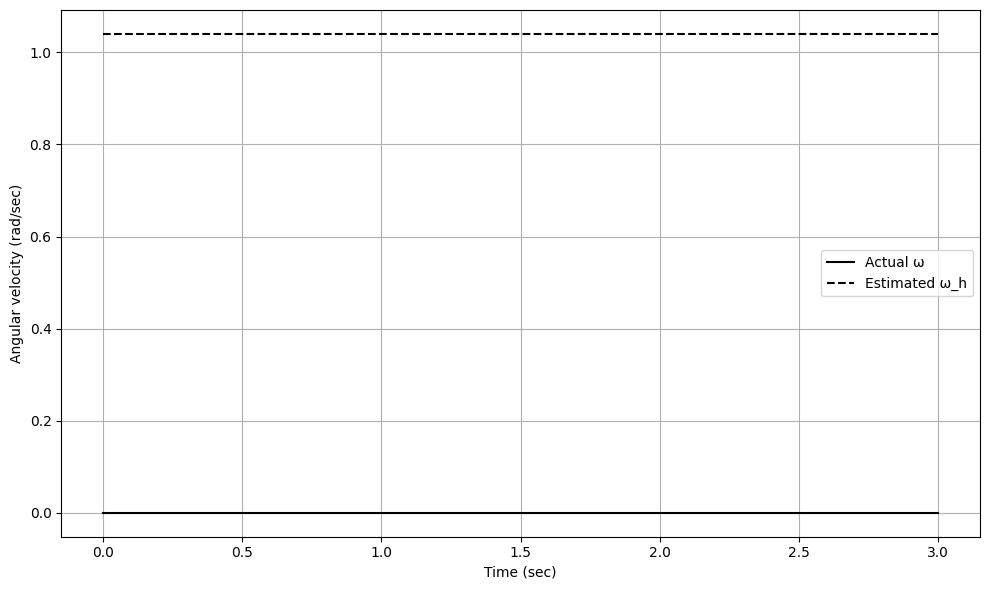

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the system model for the inverted pendulum with Luenberger observer
def inverted_pendulum_Luenberger(X, t):
    # Extract state variables
    theta, theta_dot, x, x_dot, psi = X

    # Define parameters (placeholders, you can adjust as needed)
    g = 9.81  # gravity
    l = 1.0   # length of the pendulum
    m = 1.0   # mass of the pendulum
    b = 0.1   # damping coefficient

    # Define system matrices
    A = np.array([
        [0, 1, 0, 0],
        [g / l, -b / (m * l), 0, 0],
        [0, 0, 0, 1],
        [0, 0, 0, 0]
    ])
    
    B = np.array([0, 1 / (m * l**2), 0, 0]).reshape(-1, 1)
    
    C = np.array([0, 0, 1, 0])
    
    # Define observer gain (placeholder, you can adjust as needed)
    L = np.array([0, 0, 4, 0])

    # Control input (assume zero for this example)
    u = 0

    # System dynamics
    x = np.array([theta, theta_dot, x, x_dot])
    x_dot = np.dot(A, x) + B.flatten() * u

    # Observer dynamics
    y = np.dot(C, x)
    psi_dot = L[2] * (y - np.dot(C, x))  # Simplified observer dynamics for this example

    return np.concatenate([x_dot, [psi_dot]])

# Simulation parameters
tspan = np.linspace(0, 3, 100)  # Time span for the simulation
x0 = [0, 0, 0.26, 0, 0]  # Initial conditions

# Integrate the system of differential equations
X = odeint(inverted_pendulum_Luenberger, x0, tspan)

# Extract states
theta = X[:, 0]
omega = X[:, 1]
x = X[:, 2]
x_dot = X[:, 3]
psi = X[:, 4]
omega_h = psi + 4 * x

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(tspan, omega, 'k', label='Actual ω')
plt.plot(tspan, omega_h, 'k--', label='Estimated ω_h')
plt.xlabel('Time (sec)')
plt.ylabel('Angular velocity (rad/sec)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
